# Geographic Radius Search

A demonstration of how to use American Community Survey data to do a radius search. 

In [1]:

%load_ext metapack
%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
%%metatab

Identifier: e14510ec-57b3-4fae-8c4e-c47ca7c6b55b
Name: sandiegodata.org-acs_demo-1
    
Dataset: acs_demo
Origin: sandiegodata.org
Version: 1

Section: Contacts
Wrangler: Eric Busboom
Wrangler.Email: eric@civicknowledge.com
Wrangler.Organization: Civic Knowledge
    
Section: References
    
Reference: censusreporter:B19013/140/05000US06073
Reference.Name: B19013
Reference.Description: Table B19013: Median Household Income

Reference: censusreportergeo://B01003/140/05000US06073
Reference.Name: tracts_cr
Reference.Description: Geo for tracts, from census reporter



In [3]:
mt_pkg

The GeoPandas dataframe has a ``.plot`` method that will create a map of the geo data. 

In [4]:


def fg_ax(df, x):
    """Create a matplotlib figure and axis with a given X width and a height
    to keep theboundary box aspect ratio. """
    def aspect(df):
        tb = df.total_bounds
        return abs((tb[0]-tb[2])/(tb[1]-tb[3]))
    def scale(df, x):
        return (x, x/aspect(df))
    
    fig = plt.figure(figsize = scale(df, x))
    ax = fig.add_subplot(111)
    return fig, ax

In [5]:
B19013 =  mt_pkg.reference('B19013').dataframe().set_index('geoid')

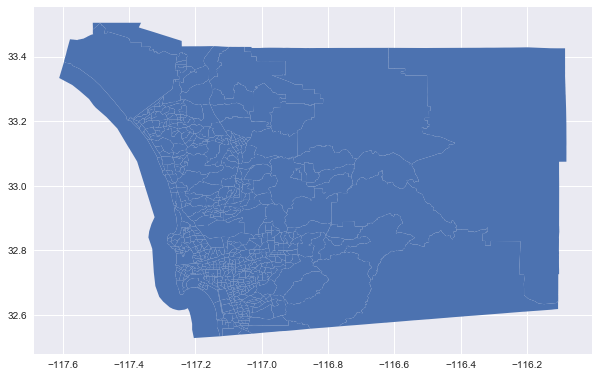

In [6]:
tracts = mt_pkg.reference('tracts_cr').dataframe().geo.set_index('geoid')

fig, ax = fg_ax(tracts, 10)
tracts.plot(ax=ax)

In [7]:
B19013t = tracts[['geometry']].join(B19013)
B19013t['centroid'] = B19013t.centroid

In [8]:
B19013t.head().T

geoid,14000US06073000100,14000US06073000201,14000US06073000202,14000US06073000300,14000US06073000400
geometry,"POLYGON ((-117.194904 32.75278, -117.19471 32....","POLYGON ((-117.178867 32.75765, -117.177966 32...","POLYGON ((-117.184043 32.74571, -117.183827 32...","POLYGON ((-117.168645 32.748968, -117.168404 3...","POLYGON ((-117.170867 32.75865, -117.170187 32..."
name,"Census Tract 1, San Diego, CA","Census Tract 2.01, San Diego, CA","Census Tract 2.02, San Diego, CA","Census Tract 3, San Diego, CA","Census Tract 4, San Diego, CA"
B19013001,125370,100436,60929,72979,68099
B19013001_m90,20257,19534,18739,18137,6673
centroid,POINT (-117.1858954211107 32.75300516279361),POINT (-117.173377504285 32.75400281293012),POINT (-117.1751539043796 32.74539468310371),POINT (-117.1623035029072 32.74478279251721),POINT (-117.1630702472801 32.75333821016532)


In [9]:
B19013.sort_values('B19013001', ascending=False).head()

,name,B19013001,B19013001_m90
geoid,,,
14000US06073008328,"Census Tract 83.28, San Diego, CA",186738.0,23840.0
14000US06073021500,"Census Tract 215, San Diego, CA",177589.0,14496.0
14000US06073008313,"Census Tract 83.13, San Diego, CA",171094.0,27193.0
14000US06073009504,"Census Tract 95.04, San Diego, CA",168167.0,19505.0
14000US06073017045,"Census Tract 170.45, San Diego, CA",160694.0,21728.0


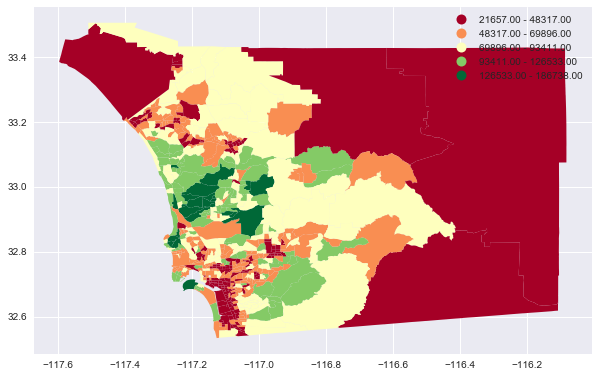

In [10]:
fig, ax = fg_ax(B19013t, 10)


B19013t.dropna().plot(
    ax=ax, column='B19013001', cmap='RdYlGn',scheme='fisher_jenks', legend=True
)


In [14]:
richest = B19013t.sort_values('B19013001', ascending=False)
B19013t['rich_d'] = B19013t.geometry.distance(richest.iloc[5].geometry)

In [ ]:
n = 20

_ = richest.iloc[:n]

fig, ax = fg_ax(richest, 10)

richest.plot(ax=ax )

_.plot(
    ax=ax, column='B19013001', cmap='RdYlGn', scheme='fisher_jenks', k=5, legend=True
)


In [ ]:
_ = B19013t[ (B19013t.rich_d > 0.05) & (B19013t.rich_d < 0.25) ] .dropna()

fig, ax = fg_ax(_, 10)

_.plot(
    ax=ax, column='rich_d', cmap='RdYlGn', scheme='fisher_jenks', k=7, legend=True
)